In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [19]:
import numpy as np

def pairwise_correlation(y, mask):
    K, L = y.shape
    correlation_matrix = np.zeros((K, K))

    for i in range(K):
        for j in range(i, K):
            # Get the two spatial points and their corresponding masks
            point1 = y[i]
            point2 = y[j]
            mask1 = mask[i]
            mask2 = mask[j]

            # Find indices where both points have observed values
            valid_indices = np.where((mask1 == 1) & (mask2 == 1))[0]

            # If there are enough valid points, calculate the correlation
            if len(valid_indices) > 1:
                valid_point1 = point1[valid_indices]
                valid_point2 = point2[valid_indices]

                # Calculate correlation
                correlation = np.corrcoef(valid_point1, valid_point2)[0, 1]
            else:
                # Not enough data to calculate correlation
                correlation = np.nan

            # Store the correlation
            correlation_matrix[i, j] = correlation
            if i != j:
                correlation_matrix[j, i] = correlation

    return correlation_matrix


In [44]:
# example 3 
from data import SoilMoisture
data = SoilMoisture()
y = data.y
x = data.x
mask = data.mask
space_coords = data.space_coords


correlation_matrix = pairwise_correlation(y, mask)




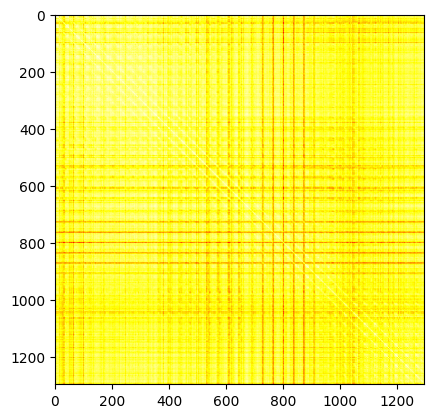

In [45]:
# Plot the correlation matrix
plt.imshow(correlation_matrix, cmap='hot')

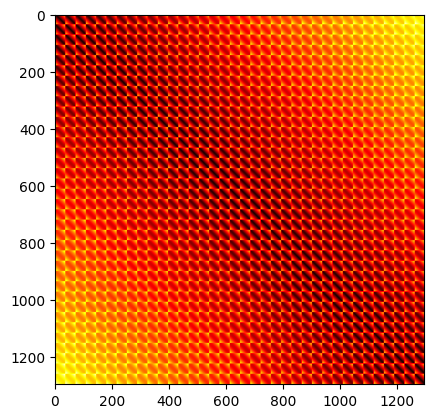

In [46]:
# heat map for dist
dist = squareform(pdist(space_coords))
plt.imshow(dist, cmap='hot')

In [51]:
# example 2
from data import AQ
data = AQ()
y = data.y
mask = data.mask
dist = data.dist

spatial_coords = data.space_coords

correlation_matrix = pairwise_correlation(y, mask)

/Users/kehuiyao/Desktop/thesis/spatiotemporal_imputation/.conda/lib/python3.9/site-packages/tsl/ops/framearray.py:181: FutureWarning: The provided callable <function nanmean at 0x10685f700> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  nan_mean = df_mean.groupby(conditions[0]).transform(np.nanmean)
/Users/kehuiyao/Desktop/thesis/spatiotemporal_imputation/.conda/lib/python3.9/site-packages/tsl/ops/framearray.py:181: FutureWarning: The provided callable <function nanmean at 0x10685f700> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  nan_mean = df_mean.groupby(conditions[0]).transform(np.nanmean)
/Users/kehuiyao/Desktop/thesis/spatiotemporal_imputation/.conda/lib/python3.9/site-packages/tsl/ops/framearray.py:181: FutureWarning: The 

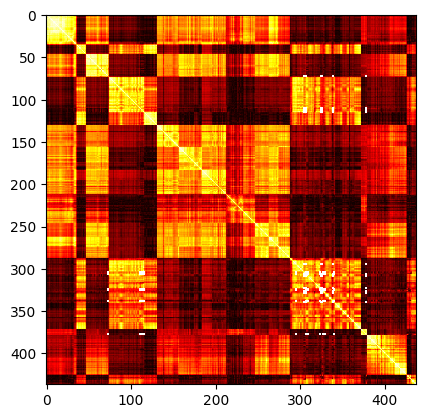

In [52]:
# heat map for correlation
plt.imshow(np.abs(correlation_matrix), cmap='hot')

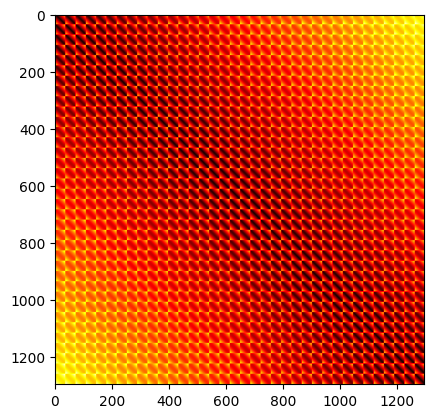

In [53]:
# heat map for dist
dist = squareform(pdist(space_coords))
plt.imshow(dist, cmap='hot')